# Collaborative Based

## importing_libraries


In [2]:
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Downloading data

In [ ]:
!wget -O moviedataset.zip https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%205/data/moviedataset.zip
!unzip -o -j moviedataset.zip 

### Reading the data with pandas


In [6]:
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## cleaning data
### removing the year from the title column and replacing and storing in a new year column.
- we should use regex or regular expressions to extracting year


In [7]:
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))',expand=False)
movies_df['year'] = movies_df.year.str.extract('(\d\d\d\d)',expand=False) #Removing the parentheses
movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '') #Removing the years from the 'title' column
movies_df['title'] = movies_df['title'].apply(lambda x: x.strip()) #to get rid of any ending whitespace characters

/tmp/ipykernel_4547/74202782.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  movies_df['title'] = movies_df.title.str.replace('(\(\d\d\d\d\))', '') #Removing the years from the 'title' column


In [8]:
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


- Dropping te genres column

In [9]:
movies_df = movies_df.drop('genres', axis='columns')

/tmp/ipykernel_4547/4063335075.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  movies_df = movies_df.drop('genres', 1)


In [10]:
movies_df.head()

,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


<br>


- ratings dataframe

In [11]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


- Dropping te timestamp column

In [13]:
ratings_df = ratings_df.drop('timestamp', axis='columns')

In [16]:
ratings_df.head()

,userId,movieId,rating
0,1,169,2.5
1,1,2471,3.0
2,1,48516,5.0
3,2,2571,3.5
4,2,109487,4.0


### data histogram

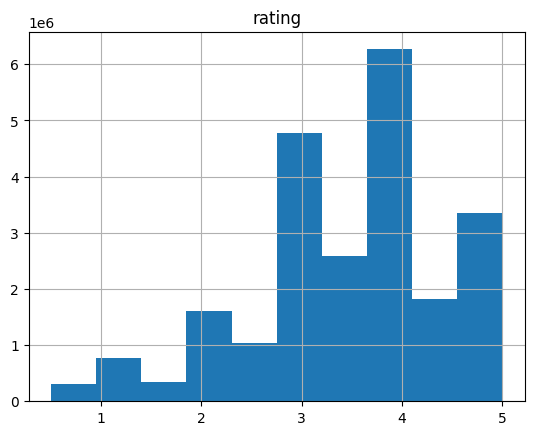

In [21]:
df_hist = ratings_df[['rating']]
df_hist.hist()
plt.show()

# Collaborative-recommender

**Types:**

- 1-User Filtering
- 2-item Filtering

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%205/images/User_Item.png" width=400px>

***

There are several methods of finding similar users
- **Pearson Correlation Function**
- **Euclidean**
- and etc

- #### creating an input user to recommend movies

In [25]:
userInput = [
              {'title':'Toy Story', 'rating':3.5},
              {'title':'Jumanji', 'rating':2},
              {'title':"Pulp Fiction", 'rating':5},
              {'title':'Akira', 'rating':4.5}
         ] 

inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,Toy Story,3.5
1,Jumanji,2.0
2,Pulp Fiction,5.0
3,Akira,4.5


- #### adding movieId to input user


In [26]:
inputId = movies_df[movies_df['title'].isin(inputMovies['title'].tolist())]
inputMovies = pd.merge(inputId, inputMovies)
inputMovies = inputMovies.drop('year', axis='columns') #Dropping information

inputMovies

,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5


- #### obtaining Values of Users (in fact We have the same values)

In [29]:
userSubset = ratings_df[ratings_df['movieId'].isin(inputMovies['movieId'].tolist())]
userSubset.head(10)

,userId,movieId,rating
19,4,296,4.0
479,13,2,2.0
531,13,1274,5.0
681,14,296,2.0
749,15,1,4.0
776,15,296,3.0
1247,17,1,5.0
1248,17,2,3.0
1333,17,296,2.0
2283,18,296,4.0


In [28]:
userSubset.shape

(172492, 3)

tip: well we have both information about input user and other users

#### groupby

In [57]:
userSubsetGroup = userSubset.groupby(['userId'])

In [58]:
userSubsetGroup.get_group(122)

,userId,movieId,rating
12034,122,1,4.5
12048,122,296,5.0
12108,122,1274,3.0


#### Sorting users
- tip: key = logic ->  lambda x: len(x[1]) causes the users who have more shared videos to be displayed first and the ones with the least ones are placed at the end of the list

In [70]:
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)
userSubsetGroup[1:3]

[(106,
        userId  movieId  rating
  9083     106        1     2.5
  9084     106        2     3.0
  9115     106      296     3.5
  9198     106     1274     3.0),
 (217,
         userId  movieId  rating
  19726     217        1     4.0
  19727     217        2     2.0
  19751     217      296     5.0
  19812     217     1274     3.5)]

### Obtaining Similarity of users to input user

- Pearson Correlation Coefficient:
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/bd1ccc2979b0fd1c1aec96e386f686ae874f9ec0 "Pearson Correlation")


#### Then we get the similarity according to 100 users

In [71]:
userSubsetGroup = userSubsetGroup[0:100]

## Pearson Correlation
Similarity input user to  whole users

In [72]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='movieId')
    inputMovies = inputMovies.sort_values(by='movieId')
    #Get the N for the formula
    nRatings = len(group)
    #Get the review scores for the movies that they both have in common
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0


In [81]:
# for example Similarity input user to 75 user is 0.8017837257372732
pearsonCorrelationDict

{75: 0.8017837257372732,
 106: 0.4629100498862757,
 217: 0.8819171036881969,
 393: 0.592156525463792,
 686: 0.8819171036881969,
 815: 0.5194624816493197,
 1040: 0.9456108576893003,
 1066: 0.9650595721775965,
 1130: 0.17039954414774924,
 1414: 0.90694099390581,
 1502: 0.8510644963469901,
 1599: 0.629940788348712,
 1625: 0.8510644963469901,
 1824: 0.8017837257372732,
 1950: 0.4364357804719848,
 1966: 0.8819171036881969,
 2065: 0.629940788348712,
 2128: 0.4795122238161564,
 2432: 0.1543033499620919,
 2473: 0.7237468644557459,
 2726: 0.7715167498104595,
 2791: 0.8819171036881969,
 2839: 0.9869275424396534,
 2948: 0.4364357804719848,
 3025: 0.3563483225498992,
 3040: 0.8728715609439696,
 3051: 0.9341484842923421,
 3116: 0.7122123116119197,
 3186: 0.6351073488299558,
 3271: 0.24209101306752098,
 3388: 0.5509080804800992,
 3392: -0.3779644730092272,
 3429: 0.2182178902359924,
 3734: -0.3563483225498992,
 4072: 0.9869275424396534,
 4079: 0.8861418804606043,
 4099: -0.033277916281986085,
 4208:

#### converting dict to dataframe

In [114]:
#orient: The from_dict() function is used to construct DataFrame from dict of array-like or dicts
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,0.801784,75
1,0.462910,106
2,0.881917,217
3,0.592157,393
4,0.881917,686


#### most similar

In [115]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

,similarityIndex,userId
92,0.991460,9721
59,0.991460,6157
60,0.986928,6207
57,0.986928,6082
22,0.986928,2839


#### Rating of selected users to all movies
- left_on: Column or index level names to join on in the left DataFrame
- right_on: Column or index level names to join on in the right DataFrame
- left_index: Use the index from the left DataFrame as the join key(s)
- right_index: Use the index from the right DataFrame as the join key

In [134]:
topUsersRating=topUsers.merge(ratings_df, left_on='userId', right_on='userId', how='inner')

In [135]:
topUsersRating.head()

,similarityIndex,userId,movieId,rating
0,0.99146,9721,1,3.5
1,0.99146,9721,2,2.0
2,0.99146,9721,6,3.0
3,0.99146,9721,7,1.0
4,0.99146,9721,10,1.0


### weightedRating =  Multiplying the similarity by the user's ratings

In [136]:
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,rating,weightedRating
0,0.99146,9721,1,3.5,3.47011
1,0.99146,9721,2,2.0,1.98292
2,0.99146,9721,6,3.0,2.97438
3,0.99146,9721,7,1.0,0.99146
4,0.99146,9721,10,1.0,0.99146


In [137]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,45.013044,166.009785
2,45.013044,112.784487
3,8.448792,24.466262
4,0.801784,1.603567
5,6.333896,15.508922


## final outcome

In [138]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()

,weighted average recommendation score,movieId
movieId,,
1,3.688037,1
2,2.505596,2
3,2.895830,3
4,2.000000,4
5,2.448560,5


Now let's sort it and see the top 20 movies that the algorithm recommended!


In [144]:
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

,weighted average recommendation score,movieId
movieId,,
46347,5.0,46347
3992,5.0,3992
8239,5.0,8239
3914,5.0,3914
6987,5.0,6987
91233,5.0,91233
7013,5.0,7013
1202,5.0,1202
4813,5.0,4813


In [145]:
movies_df.loc[movies_df['movieId'].isin(recommendation_df.head(10)['movieId'].tolist())]

,movieId,title,year
1177,1202,Withnail & I,1987
3822,3914,"Broken Hearts Club, The",2000
3899,3992,Malèna,2000
4718,4813,When Worlds Collide,1951
6876,6987,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ...",1920
6902,7013,"Night of the Hunter, The",1955
7716,8239,Viridiana,1961
11113,46347,Metal: A Headbanger's Journey,2005
18285,91233,Lifted,2006
18942,93988,North & South,2004
